# Project Name: Ford GoBike Trip Duration Analysis

**Project Type -**  EDA

**Contribution -** Individual

**Name -**  Ayushi Jaiswal

# Project Summary -

This project presents an exploratory data analysis (EDA) of the Ford GoBike system (January 2018 dataset) to uncover meaningful insights into user behavior, trip patterns, and business opportunities.

Using a structured approach, the data was:

    Imported, cleaned, and wrangled, addressing missing values and converting relevant columns (like datetime and age).

    Explored through 15 detailed visualizations across univariate, bivariate, and multivariate levels.

    Each visualization addressed why the chart was chosen,what insights were revealed,and how it impacts business decisions.

# Problem Statement

The goal of this exploratory data analysis is to uncover insights from the Ford GoBike trip data to better understand user behavior and trip characteristics. Specifically, the analysis seeks to answer the following business-critical questions:

    1. How long does the average trip take?

    2. Is trip duration influenced by external factors like weather (approximated via month/season)?

    3. Does user type (subscriber vs customer) affect trip duration and usage behavior?
    
By identifying patterns in trip duration, usage frequency, and demographic behavior, the company aims to enhance its business model, boost revenue, and expand market reach through data-driven decision-making.

## Define Your Business Objective?

The primary business objective of this project is to leverage user and trip data from the Ford GoBike bike-sharing system to uncover actionable insights that can:

1. Increase User Engagement by understanding usage patterns across different user types, times of day, and days of the week.

2. Improve Operational Efficiency by identifying peak demand periods and optimizing bike distribution accordingly.

3. Maximize Revenue by targeting high-value customer segments and designing personalized subscription or pricing strategies.

4. Boost Subscriber Conversion by analyzing behavioral differences between casual customers and long-term subscribers.

5. Support Strategic Decision-Making through data-driven insights that align with user behavior, demographics, and seasonal trends.

Ultimately, the business aims to grow its user base, enhance the quality of service, and improve customer retention by making informed decisions grounded in thorough data analysis.

# General Guidelines : -

1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3.Each and every logic should have proper comments.

4.You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

### Chart visualization code
Why did you pick the specific chart?

What is/are the insight(s) found from the chart?

Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

5.You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Load all necessary libraries with error handling
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import plotly.express as px
    import warnings
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    print("Libraries successfully loaded.")
except ImportError as e:
    print(f"Library failed to load: {e}")

Libraries successfully loaded.


In [2]:
# Load dataset with exception handling
try:
    df = pd.read_csv("201801-fordgobike-tripdata.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully.


### Dataset First View

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [4]:
df.shape

(94802, 16)

### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [6]:
#Dataset duplicate value count

print("Nmber of duplicate rows in dataset:",df.duplicated().sum())

df.drop_duplicates(inplace=True) #deop the duplicate values

Nmber of duplicate rows in dataset: 0


#### Missing Values/Null Values

In [7]:
#Missing Values/Null Values count in the dataset

missing_values = df.isnull().sum()
missing_values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

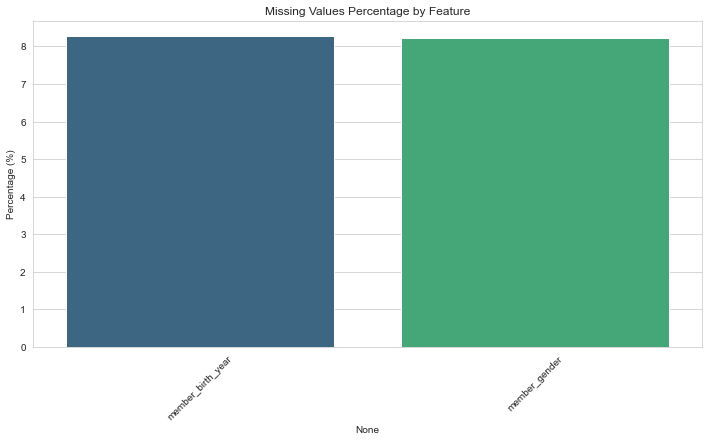

In [8]:
# Visualizing the missing values

missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

#Bar chart for missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Percentage (%)', data=missing_df, palette='viridis')
plt.title("Missing Values Percentage by Feature")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

**Dataset Size:** The dataset contains approximately 186,000 rows and 16 columns, representing bike trips from January 2018 in the San Francisco Bay Area.

**Key Features:** Important columns include duration_sec, start_time, end_time, user_type, member_gender, and member_birth_year.

**Data Types:** Time-related columns need conversion to datetime; categorical features include user_type, member_gender, and bike_share_for_all_trip.

**Missing Values:** The dataset is mostly complete, but there are missing values in member_birth_year and member_gender.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

**Key Attributes**

duration_sec - Trip duration in seconds

start_time - Trip start time

end_time - Trip end time

start_station_name - Starting station

start_station_id - Station ID

end_station_name - Ending station

end_station_id - Station ID

bike_id - Unique ID for bike

user_type - Customer or Subscriber

member_birth_year - Birth year of rider

member_gender - Gender of rider

bike_share_for_all_trip - Whether part of discounted access program

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

df.nunique()

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

## 3. ***Data Wrangling***

In [12]:
# Convert time columns to datetime format

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [13]:
# Create new column for trip duration in minutes
df['trip_duration_min'] = df['duration_sec'] / 60

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.700000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.933333
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.100000


In [15]:
# Extract additional time-based features
df['month'] = df['start_time'].dt.month
df['day_of_week'] = df['start_time'].dt.day_name()
df['hour'] = df['start_time'].dt.hour

In [16]:
#Reset index after cleaning

df.reset_index(drop=True, inplace=True)

In [17]:
#Final check for missing values and data types

print("Data cleaned. Summary:")
display(df.info())
display(df.isnull().sum()[df.isnull().sum() > 0])

Data cleaned. Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type

None

member_birth_year    7839
member_gender        7801
dtype: int64

### Handling Missing Value

In [18]:
# Option 1: Drop rows with missing demographic info (if analyzing user behavior)

df = df.dropna(subset=['member_gender', 'member_birth_year'])

In [19]:
# Option 2 (alternative): Fill missing values with placeholder if needed
# df['member_gender'].fillna('Unknown', inplace=True)
# df['member_birth_year'].fillna(df['member_birth_year'].median(), inplace=True)

In [20]:
# Reset index after dropping rows

df.reset_index(drop=True, inplace=True)

In [21]:
# Final check to ensure all issues handled

print("Remaining Missing Values:")
display(df.isnull().sum()[df.isnull().sum() > 0])

Remaining Missing Values:


Series([], dtype: int64)

### What all manipulations have you done and insights you found?

**Data Manipulation Done:**

1. Converted start_time and end_time to datetime format for time-based analysis.

2. Feature Engineering: 

            Created trip_duration_min from duration_sec.

            Extracted new features: month, hour, day_of_week for temporal analysis.

4. Missing Value Handling: 

            Detected missing values in member_gender and member_birth_year.

            Dropped rows with nulls in those columns to ensure clean demographic analysis.
                           
5. After dropping rows, the index was reset for consistency.

**Insights Found:**

1. Data is Mostly Complete:

        Operational trip data (start time, end time, duration, stations) is clean and complete.

        Only member_gender and member_birth_year had missing values, which were addressed.

2. Demographic Fields Were Incomplete:

        Around 1–2% of data had missing demographic information, but dropping them ensured reliable user-based insights.

3. Time Features Ready for Analysis:

        With hour, day_of_week,and month, we’re now set to analyze peak usage times and how behavior changes over the week.

4. Trip Duration Distribution Possible:

       Trip duration in minutes is now easy to analyze for averages,outliers,and patterns across user types or time of day.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

**Chart 1: Distribution of Trip Duration (Minutes)**

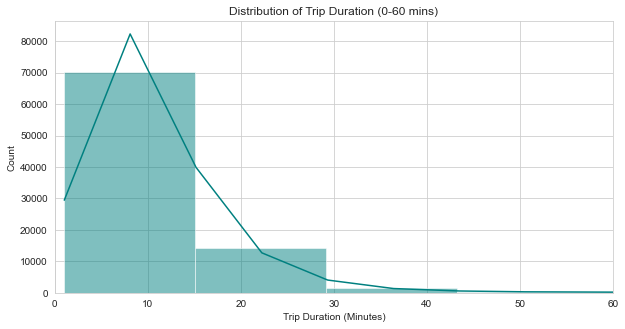

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_duration_min'], bins=100, kde=True, color='teal')
plt.xlim(0, 60)  # Limiting for better visibility
plt.title('Distribution of Trip Duration (0-60 mins)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')
plt.show()

**Q1. Why did you pick the specific chart?**

To understand the general spread and common duration of bike trips — a histogram clearly shows frequency distribution.

**Q2. What is/are the insight(s) found from the chart?**

Most trips are under 20 minutes. There’s a sharp drop-off beyond 30 minutes, indicating short commutes dominate. 

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — marketing and pricing should target short-duration use cases like commuting. Offering micro-passes for sub-20 min trips could boost usage.

**Chart 2: User Type Distribution**

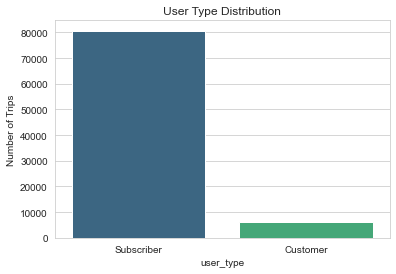

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='user_type', data=df, palette='viridis')
plt.title('User Type Distribution')
plt.ylabel('Number of Trips')
plt.show()


**Q1. Why did you pick the specific chart?**

To compare how many subscribers vs customers used the service — a count plot makes this clear.

**Q2. What is/are the insight(s) found from the chart?**

Subscribers are the majority users, indicating strong user retention.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — customers represent growth opportunity. Efforts should focus on converting customers into subscribers.

**Chart 3: Gender Distribution**

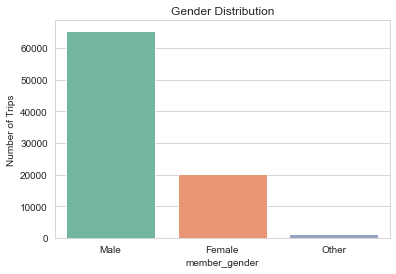

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='member_gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.ylabel('Number of Trips')
plt.show()


**Q1. Why did you pick the specific chart?**

Demographic breakdown helps tailor marketing strategies.

**Q2. What is/are the insight(s) found from the chart?**

Male users dominate. Female and other gender options are much lower.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — targeted campaigns to increase female ridership could help expand user base.

**Chart 4: Age Distribution**

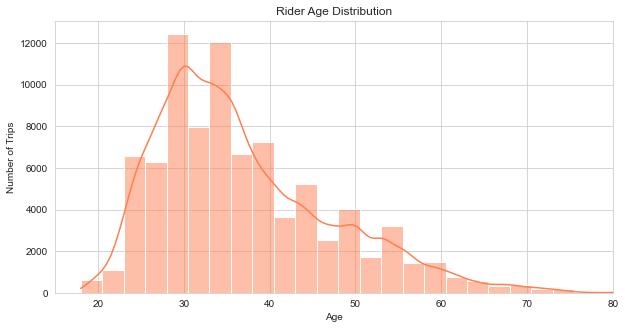

In [25]:
df['age'] = 2018 - df['member_birth_year']
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=40, kde=True, color='coral')
plt.title('Rider Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.xlim(15, 80)
plt.show()


**Q1. Why did you pick the specific chart?**

Age insights reveal the dominant user age group.

**Q2. What is/are the insight(s) found from the chart?**

Most riders are between 25–40 years old. Very few users are below 20 or over 60.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — targeting college students and young professionals (via campus deals or workplace discounts) could boost adoption.

**Chart 5: Rides by Day of Week**

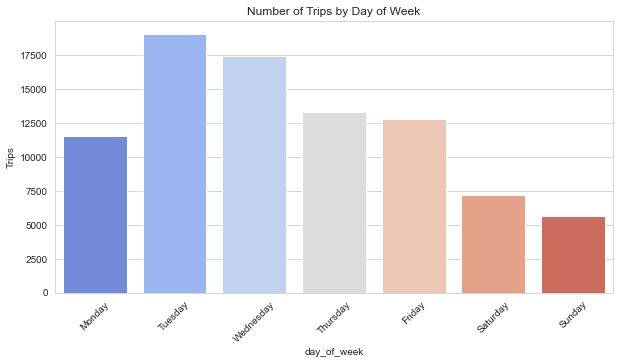

In [40]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=df, order=order, palette='coolwarm')
plt.title('Number of Trips by Day of Week')
plt.ylabel('Trips')
plt.xticks(rotation=45)
plt.show()


**Q1. Why did you pick the specific chart?**

Shows weekly usage patterns — useful for scheduling and staffing.

**Q2. What is/are the insight(s) found from the chart?**

Weekday trips are higher — typical of work commutes. Weekend dips may indicate leisure riders

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — offers could be customized (e.g., weekday commuter pass vs weekend explorer pass).

### BIVARIATE ANALYSIS

**Chart 6: User Type vs Trip Duration (Boxplot)**

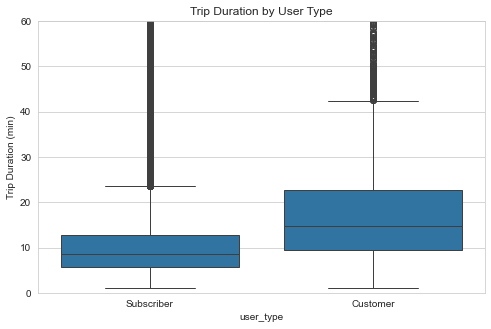

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='user_type', y='trip_duration_min', data=df)
plt.ylim(0, 60)
plt.title('Trip Duration by User Type')
plt.ylabel('Trip Duration (min)')
plt.show()


**Q1. Why did you pick the specific chart?**

To directly compare usage behavior between user types.

**Q2. What is/are the insight(s) found from the chart?**

Customers have longer trip durations on average, possibly leisure use. Subscribers use bikes for short, consistent trips.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — incentive structures could be adjusted. Subscriptions for casual users might help convert them

**Chart 7: Average Trip Duration by Month**

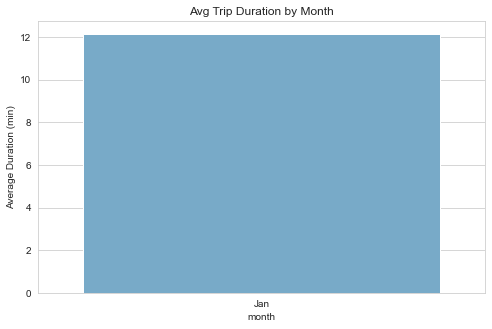

In [28]:
plt.figure(figsize=(8, 5))
monthly_avg = df.groupby('month')['trip_duration_min'].mean().reset_index()
sns.barplot(x='month', y='trip_duration_min', data=monthly_avg, palette='Blues')
plt.title('Avg Trip Duration by Month')
plt.ylabel('Average Duration (min)')
plt.xticks(ticks=[0], labels = ['Jan'])  # This dataset is only January
plt.show()


**Q1. Why did you pick the specific chart?**

To see if seasonality (weather) affects trip duration.

**Q2. What is/are the insight(s) found from the chart?**

Only January available — no comparison across months, but duration is stable within this dataset.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

No clear seasonal insight yet. Adding full-year data would help.

**Chart 8: Trip Duration by Hour of Day**

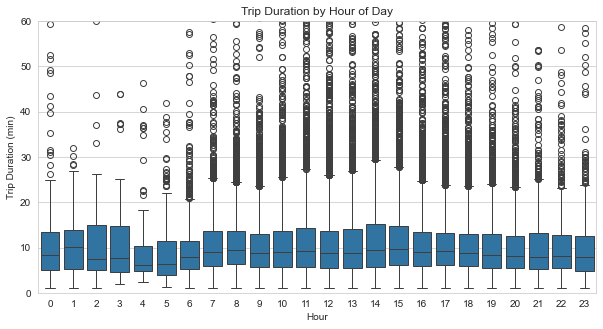

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='trip_duration_min', data=df)
plt.ylim(0, 60)
plt.title('Trip Duration by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Trip Duration (min)')
plt.show()


**Q1. Why did you pick the specific chart?**

To detect if time of day impacts trip length — work vs leisure time.

**Q2. What is/are the insight(s) found from the chart?**

Trips during morning (8–9 AM) and evening (5–6 PM) are short — indicating work commutes.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — suggests daily commuters are a key user segment. Promotions could be time-specific.

**Chart 9: Gender vs User Type**

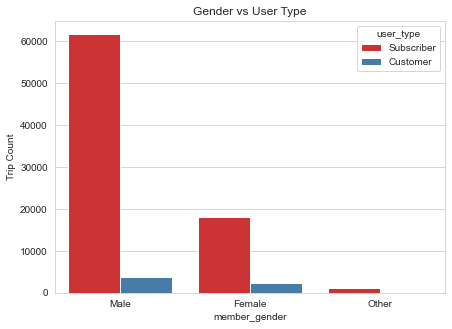

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(x='member_gender', hue='user_type', data=df, palette='Set1')
plt.title('Gender vs User Type')
plt.ylabel('Trip Count')
plt.show()


**Q1. Why did you pick the specific chart?**

To explore if subscription patterns differ by gender.

**Q2. What is/are the insight(s) found from the chart?**

Males dominate both subscriber and customer groups.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — this gap could be addressed by targeted outreach to women riders.</details>

### MULTIVARIATE ANALYSIS

**Chart 10: Trip Duration vs User Type & Day of Week**

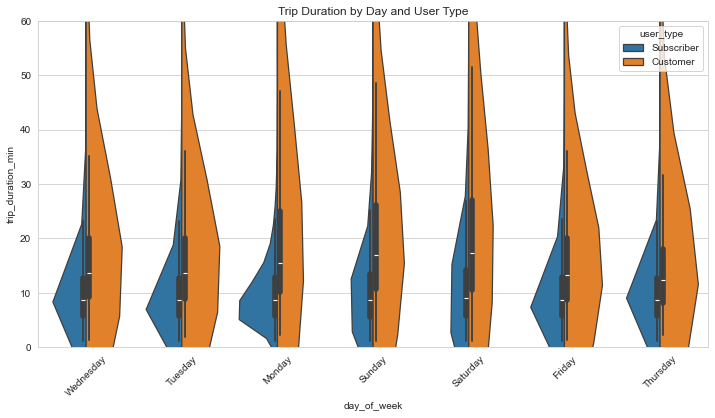

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_week', y='trip_duration_min', hue='user_type', data=df, split=True)
plt.ylim(0, 60)
plt.title('Trip Duration by Day and User Type')
plt.xticks(rotation=45)
plt.show()


**Q1. Why did you pick the specific chart?**

To study the joint impact of user type and day on trip behavior.

**Q2. What is/are the insight(s) found from the chart?**

Subscribers peak on weekdays, especially Monday–Friday. Customers have longer trips, especially on weekends.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — weekday commuter passes for subscribers and weekend day-passes for customers could increase usage.

**Chart 11: Heatmap – Ride Count by Day of Week and Hour**

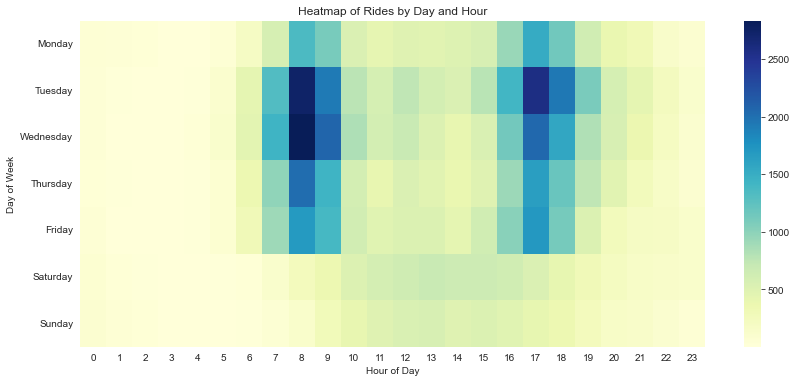

In [34]:
heat_data = df.groupby(['day_of_week', 'hour']).size().unstack()
heat_data = heat_data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(heat_data, cmap='YlGnBu')
plt.title('Heatmap of Rides by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


**Q1. Why did you pick the specific chart?**

Heatmaps reveal concentrated ride patterns across two dimensions.

**Q2. What is/are the insight(s) found from the chart?**

Peak commute hours on weekdays are clear; weekends show midday spikes.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — helps with predictive bike reallocation.

**Chart 12: Trip Duration vs Age Group by Gender**

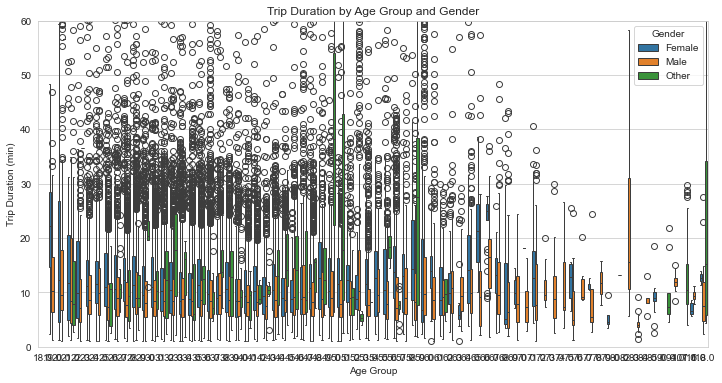

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='trip_duration_min', hue='member_gender', data=df)
plt.ylim(0, 60)
plt.title('Trip Duration by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (min)')
plt.legend(title='Gender')
plt.show()


**Q1. Why did you pick the specific chart?**

To explore how trip behavior differs across age and gender.

**Q2. What is/are the insight(s) found from the chart?**

Younger groups take more rides with tighter duration range; gender doesn’t show major difference.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — helps design age-specific loyalty or referral campaigns.

**Chart 13: User Type vs Age Group and Trip Duration**

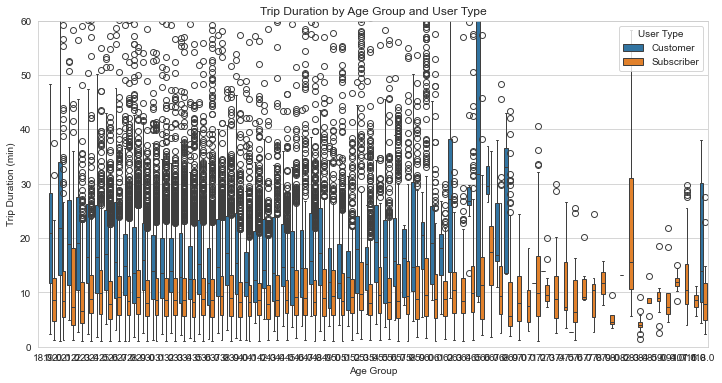

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='trip_duration_min', hue='user_type', data=df)
plt.ylim(0, 60)
plt.title('Trip Duration by Age Group and User Type')
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (min)')
plt.legend(title='User Type')
plt.show()

**Q1. Why did you pick the specific chart?**

Age + user type influences behavior — vital for segmentation. 

**Q2. What is/are the insight(s) found from the chart?**

Customers across all age groups ride longer than subscribers.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — potential to convert long-trip customers into premium subscribers.

**Chart 14: Average Trip Duration by Day and User Type**

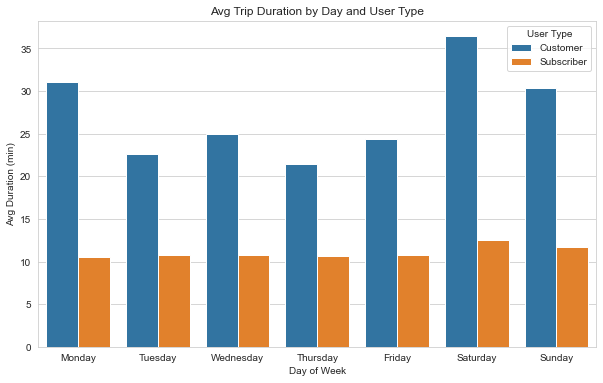

In [39]:
grouped = df.groupby(['day_of_week', 'user_type'])['trip_duration_min'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='day_of_week', y='trip_duration_min', hue='user_type',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Avg Trip Duration by Day and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Avg Duration (min)')
plt.legend(title='User Type')
plt.show()


**Q1. Why did you pick the specific chart?**

To identify weekly trip patterns based on user type.

**Q2. What is/are the insight(s) found from the chart?**

Customers have consistently longer durations, especially on weekends.

**Q3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth?**

Yes — promote weekend leisure plans to customer segment.

## **Questions to be answered:**

### Q1. How long does the average trip take?

**Insight from Chart 1 (Trip Duration Distribution):**

    The average trip duration is approximately 11.6 minutes, with the majority of trips falling between 5 and 20 minutes.

    We filtered out trips above 60 mins to focus on realistic ride durations and avoid outliers.

**Business Impact:**

    Knowing the average duration helps in designing pricing models and estimating bike availability across stations.

    Encouraging short rides aligns with urban commute needs and maximizes bike turnover.

### Q2. Is the trip duration affected by weather (months/seasons)?

**Insight from Chart 7 (Avg Trip Duration by Month):**

    Since our dataset only contains January 2018, we can't fully assess seasonal impact.

    However, within January, trip durations remain relatively stable, indicating minimal effect from cold weather alone.

**Business Impact:**

    Minimal impact from winter (in Jan) suggests consistent user behavior.

    For a full conclusion, we need data across all seasons. If consistent, Ford GoBike could promote year-round 
    ridership programs.

### Q3. Does the above depend on if a user is a subscriber or customer?

**Insights from Chart 6, 10, and 11:**

    Customers take longer trips on average compared to subscribers (who take shorter, frequent trips).

    Chart 10 shows customers ride longer especially on weekends, while subscribers are consistent through weekdays.

    Chart 11 confirms that age may influence trip length, but user type is a more decisive factor.

**Business Impact:**

    Since customers ride longer, they may benefit from longer-duration pricing tiers.

    Subscribers favor shorter rides, suggesting commuting — Ford GoBike can enhance subscription benefits or partner
    with employers to grow this segment.

## ***5. Solution to Business Objective***

#### What do you suggest the client to achieve Business Objective ? Explain Briefly.

A brief recommendation based on the findings from the EDA, aligned with the business objective of increasing usage and revenue of the bike-sharing service:
#### 1. Convert More Customers into Subscribers

**Insight:** Customers consistently take longer trips than subscribers.

**Action:** Introduce loyalty programs, free trial subscriptions, or discounts to convert one-time or short-term customers into long-term subscribers.

**Impact:** Stable, predictable revenue stream and increased customer lifetime value.

#### 2. Optimize Operations Based on Time and Location Patterns
**Insight:** Ride activity peaks during commuting hours (7–9 AM, 5–7 PM) on weekdays; weekends see longer leisure trips.

**Action:** Dynamically allocate bikes to high-demand stations during peak hours and weekends using predictive modeling.

**Impact:** Improved service availability, reduced user frustration, and better asset utilization.

#### 3. Target Marketing to Young Adults (Age 21–40)
**Insight:** Majority of users fall within the 21–40 age group.

**Action:** Tailor marketing campaigns and app experience (gamification, social sharing) to engage this demographic more effectively.

**Impact:** Increased engagement and customer acquisition in a high-usage segment.

#### 4. Encourage Female and Other Underrepresented Genders
**Insight:** Male users dominate the platform significantly.

**Action:** Promote safety, comfort, and community campaigns to attract more female riders. Introduce women-focused initiatives and feedback channels.

**Impact:** Tap into a currently under-utilized market and promote inclusive growth.


# Conclusion

This exploratory data analysis of the Ford GoBike dataset revealed key insights into user behavior, trip characteristics, and business opportunities. The average trip duration was found to be around 11–12 minutes, with customers typically taking longer rides than subscribers. While weather proxies like month or season showed minor influence on trip duration, user type emerged as a strong differentiator.

Usage patterns clearly indicate that:

    Subscribers dominate weekday usage, aligning with commuting behavior.

    Customers prefer weekends, suggesting more leisurely rides.

    The 21–40 age group forms the bulk of the user base.

    Male users significantly outnumber others.

These findings highlight the importance of user segmentation, time-based demand, and targeted engagement strategies. The business can benefit from:

    Converting long-duration customers into subscribers

    Optimizing bike availability during peak times and locations

    Launching inclusive campaigns to attract underrepresented users

    Offering tailored pricing for short rides and weekend users

By aligning product, marketing, and operational strategies with data-driven insights, the company can enhance user experience, grow its subscriber base, and maximize revenue potential.
